# Some examples using ggplot2

Mygraphics library has an easy API to build nice graphics. 
Functions usually requires a data.frame with four columns: x, variable, value, and colors. 
The variable is a required parameter for all examples. 

## Library
The library myGraphics.R has a function named loadlibrary that is responsible for checking installed packages. 
Once the package is installed, it is loaded.
Take some time looking the parameters of functions available at https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphics.R. They can be helpful in setting up your graphics. 

In [27]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphics.R")
loadlibrary("reshape")
loadlibrary("dplyr")
loadlibrary("RColorBrewer")
loadlibrary("gridExtra")

## Color pallete

Color brewer is a nice toll to setup color for your graphics. 

In [28]:
col_set <- brewer.pal(11, 'Spectral')
col_2 <- col_set[c(4,9)]
col_3 <- col_set[c(4,9,11)]
col_4 <- col_set[c(3,5,7,9)]   
col_2b <- col_set[c(9,3)]    
options(repr.plot.width=4, repr.plot.height=3) 

## Datasets for the examples

This function creates the basic dataset used in the examples.

In [44]:
create_dataset <- function() {
  data <- read.table(text = "Year Months Flights Delays
                     2016 Jan-Mar 11 6
                     2016 Apr-Jun 12 5
                     2016 Jul-Sep 13 3
                     2016 Oct-Dec 12 5
                     2017 Jan-Mar 10 4
                     2017 Apr-Jun 9 3
                     2017 Jul-Sep 11 4
                     2017 Oct-Dec 20 5
                     2018 Jan-Mar 15 3
                     2018 Apr-Jun 12 5
                     2018 Jul-Sep 13 3
                     2018 Oct-Dec 8 4",
                     header = TRUE,sep = "")  
  data$OnTime <- data$Flights - data$Delays 
  data$Perc <- round(100 * data$Delays / data$Flights)
  return(data)
}

data <- create_dataset()
head(data)

Year,Months,Flights,Delays,OnTime,Perc
2016,Jan-Mar,11,6,5,55
2016,Apr-Jun,12,5,7,42
2016,Jul-Sep,13,3,10,23
2016,Oct-Dec,12,5,7,42
2017,Jan-Mar,10,4,6,40
2017,Apr-Jun,9,3,6,33


Data adjustment for ggplot usage:

In [45]:
adjust_dataset <- function(data) {
  data <- melt(data[,c('Year', 'Months', 'Flights', 'Delays', 'OnTime', 'Perc')], id.vars = c(1,2))
  data$x <- sprintf("%d-%s", data$Year, data$Months)
  data$x <- factor(data$x,levels = data$x[1:12])
  return(data)
}
data <- adjust_dataset(data)
head(data)

Year,Months,variable,value,x
2016,Jan-Mar,Flights,11,2016-Jan-Mar
2016,Apr-Jun,Flights,12,2016-Apr-Jun
2016,Jul-Sep,Flights,13,2016-Jul-Sep
2016,Oct-Dec,Flights,12,2016-Oct-Dec
2017,Jan-Mar,Flights,10,2017-Jan-Mar
2017,Apr-Jun,Flights,9,2017-Apr-Jun


## Scatter plot

This example filters data for flights and delays. It uses two colors and setup x and y labels. 

The function returns a preset graphic that can be enhanced. In this case, we change the x labels orientations and add a centered title.

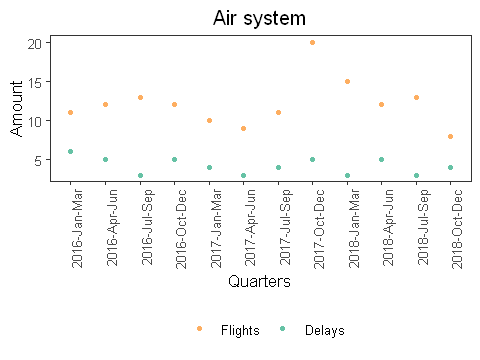

In [46]:
grfs <- plot.scatter(data %>% filter(variable %in% c('Flights', 'Delays')), 
                     colors=col_2, label_x = "Quarters", label_y = "Amount") 
grfs <- grfs + theme(axis.text.x = element_text(angle=90, hjust=1))
grfs <- grfs + ggtitle("Air system") + theme(plot.title = element_text(hjust = 0.5))
plot(grfs)

## Line plot
This example filters data for flights and delays. It uses the default configuration and extends the x labels orientation to 45 degrees. 

It is very important to try to associate the same color for a certain data/method. In this case, delays and flights are presented in the same color as in the previous graphic. 

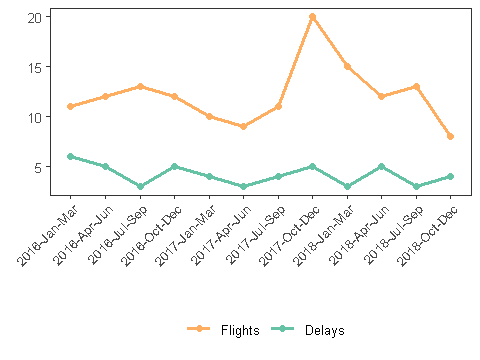

In [47]:
grfs <- plot.series(data %>% filter(variable %in% c('Flights', 'Delays')),colors=col_2) 
grfs <- grfs + theme(axis.text.x = element_text(angle=45, hjust=1))
plot(grfs)

## Bar graph
This graphic filters data for flights and presents the first 11 quarters. Each quarter is presented in a specific color. 
The function coord_flip() enables horizontal bar plot.
The function grid.arrange can put graphics side by side.

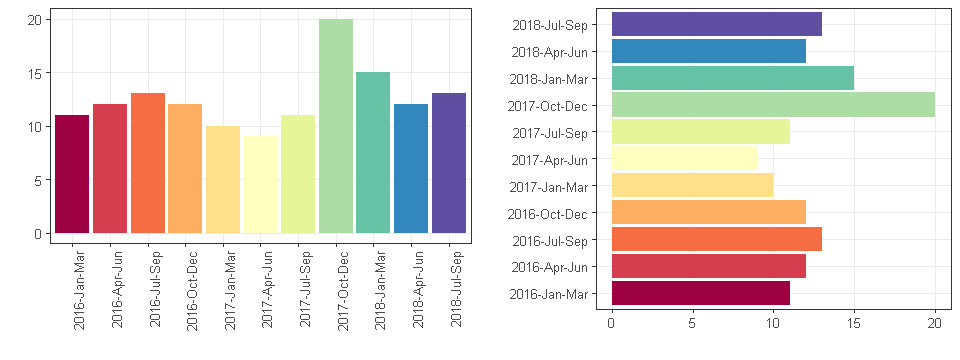

In [48]:

grf <- plot.bar(data[1:11,] %>% filter(variable=='Flights') %>% select(variable=x, value=value), colors=col_set)
grfb <- grf + theme(axis.text.x = element_text(angle=90, hjust=1))
grfh <- grf + coord_flip()
options(repr.plot.width=8, repr.plot.height=3)
grid.arrange(grfb, grfh, ncol=2)
options(repr.plot.width=4, repr.plot.height=3)


## Bar graph with error bars
This presents the average and the standard deviation of delays per quarters through the years. 
For that, it aggregates mean and sd values according quarters. 
The conversion of variable to factor is to sort it according to quarter semantics, instead of alphabetical order. 
The error bar is added using geom_errorbar() function. 

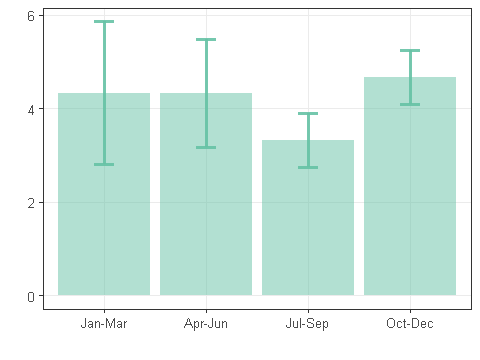

In [52]:
data_sd <- create_dataset() %>% 
  select(variable=Months, value=Delays) %>% 
  group_by(variable) %>% 
  summarize(sd = sd(value), value = mean(value))

data_sd$variable <- factor(data_sd$variable,levels = c('Jan-Mar','Apr-Jun','Jul-Sep','Oct-Dec'))

grf <- plot.bar(data_sd, colors=col_2[2], alpha=0.5)
grf <- grf + geom_errorbar(aes(x=variable, ymin=value-sd, ymax=value+sd), width=0.2, colour=col_2[2], alpha=0.9, size=1.1) 

plot(grf)


## Grouped bar & Stacked-bar

Grouped bar or stacked bars can present different perspectives for the same data.


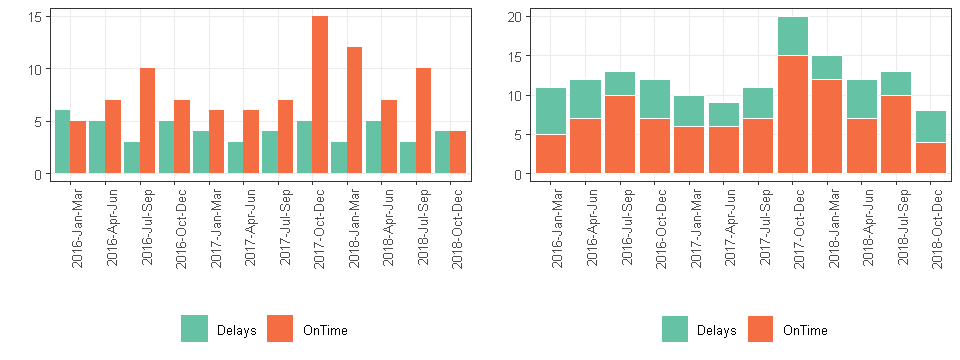

In [53]:
grfb <- plot.bar(data %>% filter(variable %in% c('OnTime', 'Delays')), colors=col_2b, group=TRUE)
grfb <- grfb + theme(axis.text.x = element_text(angle=90, hjust=1))
grfsb <- plot.stackedbar(data %>% filter(variable %in% c('OnTime', 'Delays')), colors=col_2b) 
grfsb <- grfsb + theme(axis.text.x = element_text(angle=90, hjust=1))

options(repr.plot.width=8, repr.plot.height=3)
grid.arrange(grfb, grfsb, ncol=2)
options(repr.plot.width=4, repr.plot.height=3)

## Faced grouped bar
This graphic uses a face column to group data. 
It filters data for on-time and delayed flights. 

In this graphic labels are set for x and y axis and legend.

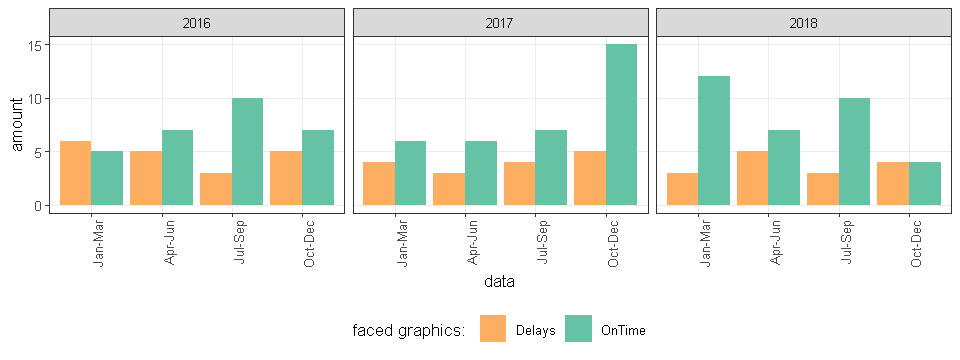

In [54]:
grf <- plot.bar(data %>% filter(variable %in% c('OnTime', 'Delays')) %>% 
                select(x=Months, face=Year, variable=variable, value=value), group=TRUE, colors=col_2)
grf <- grf + theme(axis.text.x = element_text(angle=90, hjust=1))
grf <- grf + facet_wrap(~face, ncol = 3) 
grf <- grf + xlab("data")
grf <- grf + guides(fill=guide_legend(title="faced graphics:"))
grf <- grf + ylab("amount")

options(repr.plot.width=8, repr.plot.height=3)
plot(grf)
options(repr.plot.width=4, repr.plot.height=3)

## Pie chart
In this graphic data is filtered for year 2016 and only include flights. 
For each quarter it is associated a pie-slice with a particular color. 
The conversion of variable to factor enables ordering the legend according to the semantics of the data instead of alphabetical sort. 

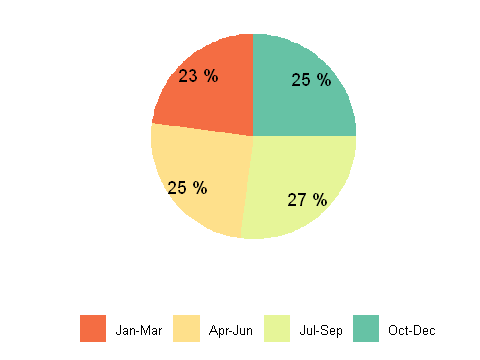

In [55]:
mypiedata <- data %>% filter(Year == 2016 & variable =="Flights") %>% select(variable=Months, value=value)
mypiedata$variable <- factor(mypiedata$variable,levels = c('Oct-Dec', 'Jul-Sep', 'Apr-Jun', 'Jan-Mar'))
mypiedata$colors <- col_4
mypiedata <- prepare.pieplot(mypiedata)

grfpie <- plot.pieplot(mypiedata, colors=as.character(mypiedata$colors))
plot(grfpie)

## Lollipop plot

In this graphic only the percentage of delayed flights is presented. 

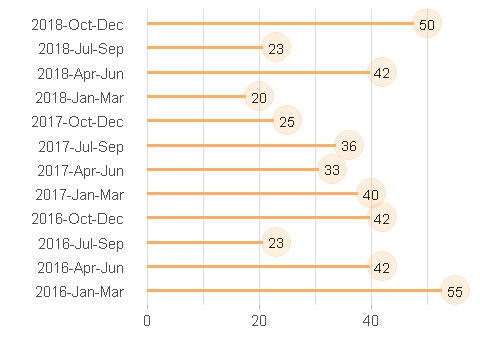

In [56]:
grf <- plot_lollipop(data %>% filter(variable =="Perc") %>% select(variable=x,value=value), col_2[1], max_value_gap=2.25)
plot(grf)

## Density plot
This graphic presents the on-time and delayed flights density distribution.

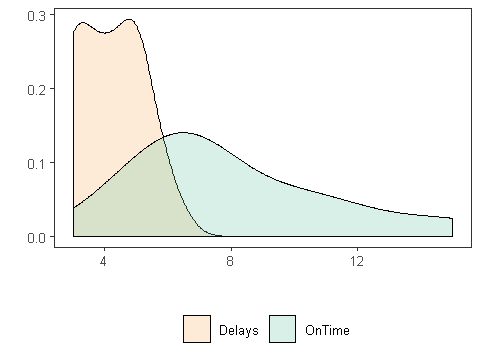

In [57]:
grfgd <- plot.density(data %>% filter(variable %in% c('OnTime', 'Delays')), label_series = "", colors=col_2)
plot(grfgd)

## Histogram
This graphic presents on-time and delayed flights density distribution.

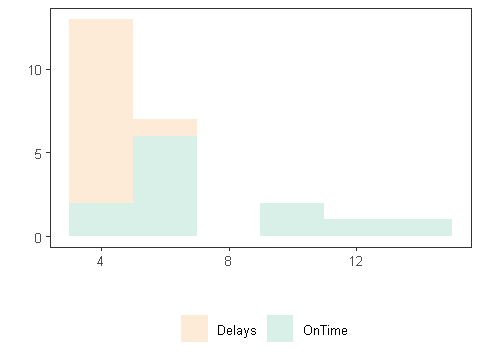

In [58]:
grfgd <- plot.hist(data %>% filter(variable %in% c('OnTime', 'Delays')), label_series = "", colors=col_2, bin=2)
plot(grfgd)

## Box-plot
This graphic presents the on-time and delayed flights boxplot.

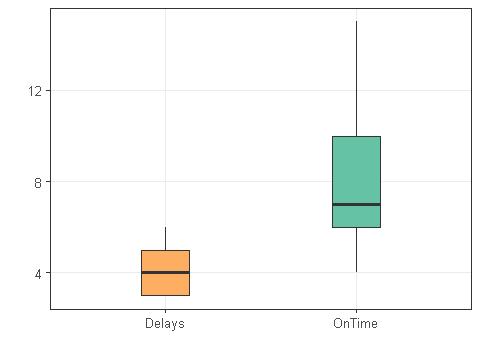

In [59]:
grfb <- plot.boxplot(data %>% filter(variable %in% c('OnTime', 'Delays')), colors=col_2)
plot(grfb)

## Building PDF from graphics

In [13]:
pdf("examples/plot.pdf", width=4, height=3)
plot(grfb)
dev.off()

png 
  2